**Using the `yfinance` library to import data**  
**Plot the data**  
**Compute returns from prices**  
___

<span style="color:red">$\Downarrow$</span> The following should be run once if you have not already installed the `yfinance` package.  
<https://github.com/ranaroussi/yfinance>

In [ ]:
%pip install yfinance

---

Standard importations for this notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

import yfinance

# Importing a single ticker

Use `yfinance` to import prices of the [S&P 500 Index](https://finance.yahoo.com/quote/%5EGSPC).

In [2]:
data = yfinance.download(tickers='^GSPC', start='2019-01-01', end='2023-12-31', interval='1d')

[*********************100%%**********************]  1 of 1 completed


If you cannot use `yfinance`, load the data from an Excel file. See the section *Save the data into an Excel file*.

## Content of the DataFrame

Print the type and shape of the variable `data` using an f-string (see a short guide [here](https://realpython.com/python-f-strings/)).

In [3]:
print(f"type is {type(data)}")
print(f"shape is {data.shape}")
print(f"size of the sample is {data.shape[0]}")

type is <class 'pandas.core.frame.DataFrame'>
shape is (1258, 6)
size of the sample is 1258


Display the first and the last elements of `data`. Note that `Date` is the index of the DataFrame.

In [5]:
data.head().round(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2476.96,2519.49,2467.47,2510.03,2510.03,3733160000
2019-01-03,2491.92,2493.14,2443.96,2447.89,2447.89,3858830000
2019-01-04,2474.33,2538.07,2474.33,2531.94,2531.94,4234140000
2019-01-07,2535.61,2566.16,2524.56,2549.69,2549.69,4133120000
2019-01-08,2568.11,2579.82,2547.56,2574.41,2574.41,4120060000


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000
2023-12-28,4786.439941,4793.299805,4780.979980,4783.350098,4783.350098,2698860000
2023-12-29,4782.879883,4788.430176,4751.990234,4769.830078,4769.830078,3126060000


Extract the column `Adj Close` of the DataFrame. What is the type of this extracted column?

In [16]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
data['Adj Close']

Date
2019-01-02    2510.030029
2019-01-03    2447.889893
2019-01-04    2531.939941
2019-01-07    2549.689941
2019-01-08    2574.409912
                 ...     
2023-12-22    4754.629883
2023-12-26    4774.750000
2023-12-27    4781.580078
2023-12-28    4783.350098
2023-12-29    4769.830078
Name: Adj Close, Length: 1258, dtype: float64

## Check for *Not a Number* values

Use `info()` to obtain details about the DataFrame. Then check for some missing data using `isna().any()`.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [10]:
data.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

Extract all the row which contain at least one `NaN`

In [11]:
data[data.isna().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


If necessary, delete these rows

In [ ]:
data.dropna(inplace=True)

## Save the data into an Excel file

If you have an error, you may need to install the package `openpyxl`.

In [ ]:
data.to_excel('SP500.xlsx')

To read the data stored in an Excel file

In [12]:
data = pd.read_excel('SP500.xlsx')

In [15]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000


In [14]:
data.set_index('Date', inplace=True)

# Plot the data

## First plot of the data

Plot the values of the column `Adj Close` with pandas.

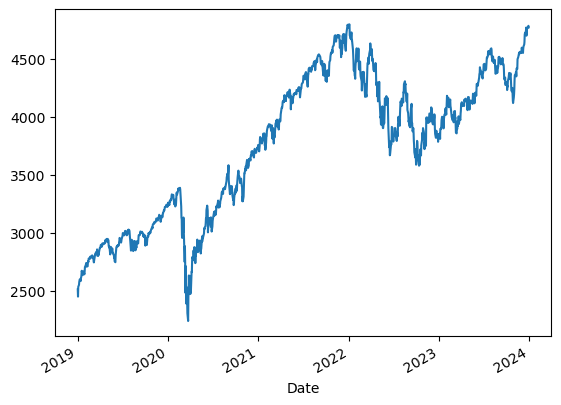

In [17]:
ax = data['Adj Close'].plot()

Plot the values of the column `Adj Close` with matplotlib.  
In this course, I use [`matplotlib.pyplot.subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) to create plots.

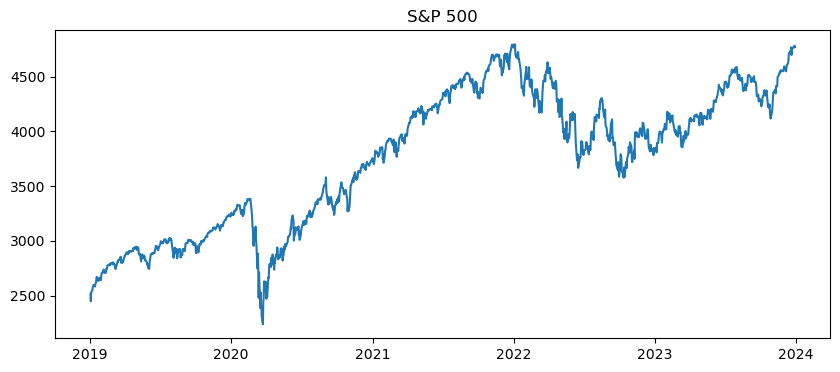

In [18]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(data['Adj Close'])
ax.set_title("S&P 500");

## Improve the graphs

Change the ticks on the x-axis to have one mark every two years  
- https://matplotlib.org/stable/api/dates_api.html#matplotlib.dates.DateFormatter  
- https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior

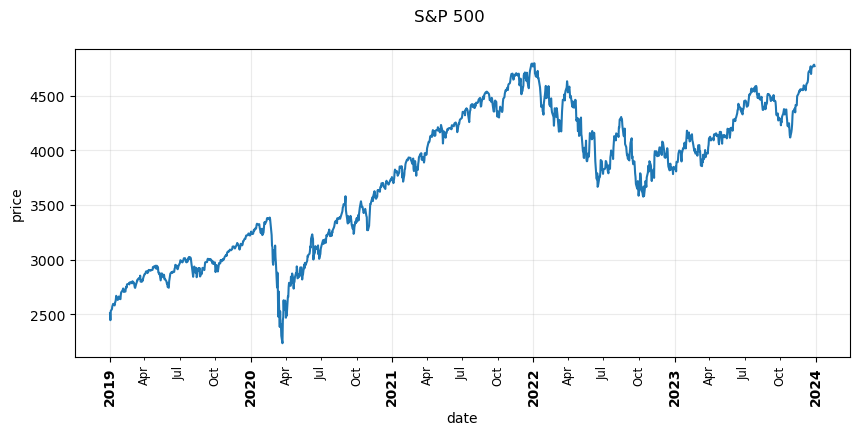

In [21]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(data['Adj Close'])

ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_minor_locator(mdates.MonthLocator([4, 7, 10]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
plt.setp(ax.get_xticklabels(), rotation=90, weight='bold')
plt.setp(ax.get_xticklabels(minor=True), rotation=90, size='smaller')
plt.grid(alpha=0.25)

ax.set_xlabel("date")
ax.set_ylabel("price")
fig.suptitle("S&P 500");

**Change the y-scale to logarithmic**.  
Can be obtained using `ax.set_yscale('log')` or with the built-in `semilogy()` method.

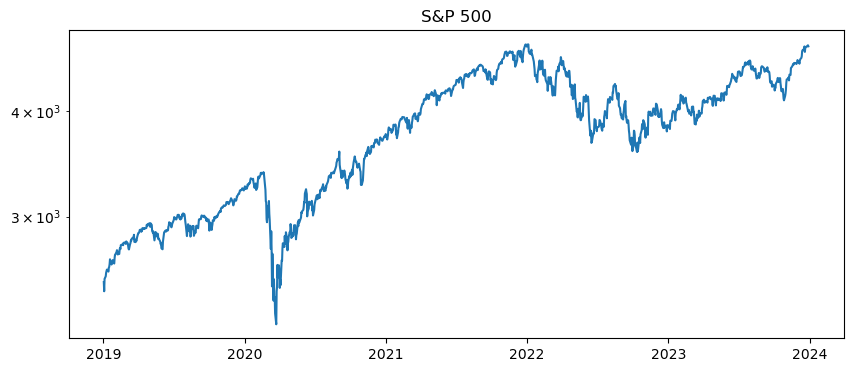

In [22]:
fig, ax = plt.subplots(figsize=(10,4))
ax.semilogy(data['Adj Close'])
ax.set_title("S&P 500");

Define the positions and labels of the tick marks on the y-axis

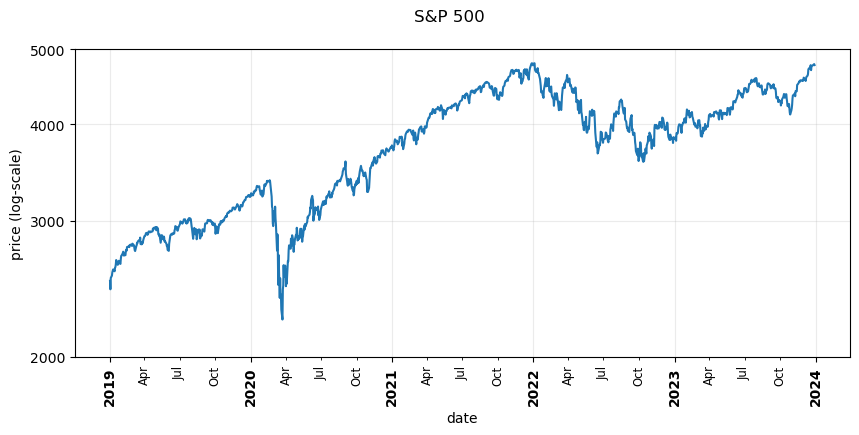

In [23]:
price_ticks = 1e3 * np.array([2, 3, 4, 5])
price_tick_labels = ['2000', '3000', '4000', '5000']

fig, ax = plt.subplots(figsize=(10,4))

ax.semilogy(data['Adj Close'])

ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_minor_locator(mdates.MonthLocator([4, 7, 10]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
plt.setp(ax.get_xticklabels(), rotation=90, weight='bold')
plt.setp(ax.get_xticklabels(minor=True), rotation=90, size='smaller')

ax.set_yticks(ticks=price_ticks)
ax.set_yticklabels(price_tick_labels)

plt.grid(alpha=0.25)

ax.set_xlabel("date")
ax.set_ylabel("price (log-scale)")
fig.suptitle("S&P 500");

# Adding indicators on the graph

## Moving averages

In [24]:
MA1 = data['Adj Close'].rolling(65).mean()
MA2 = data['Adj Close'].rolling(260).mean()

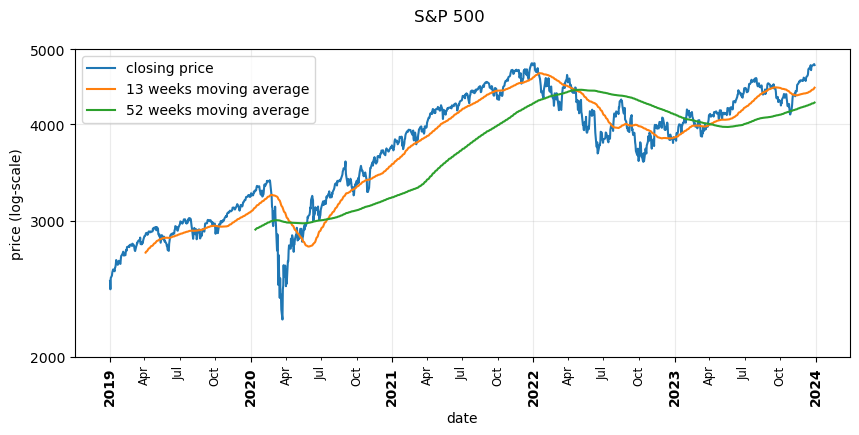

In [25]:
fig, ax = plt.subplots(figsize=(10,4))

ax.semilogy(data['Adj Close'], label="closing price")
ax.plot(MA1, label="13 weeks moving average")
ax.plot(MA2, label="52 weeks moving average")

ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_minor_locator(mdates.MonthLocator([4, 7, 10]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
plt.setp(ax.get_xticklabels(), rotation=90, weight='bold')
plt.setp(ax.get_xticklabels(minor=True), rotation=90, size='smaller')

ax.set_yticks(ticks=price_ticks)
ax.set_yticklabels(price_tick_labels)

ax.set_xlabel("date")
ax.set_ylabel("price (log-scale)")

ax.grid(alpha=0.25)

ax.legend()
fig.suptitle("S&P 500");

## Volume

- Create two subplots with `plt.subplots()`  
 <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html>
- and plot the price and the volume using `stackplot()`. There are other ploting functions that could be used here such as `bar()` or `stem()`.  
 https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.stackplot.html

In [26]:
data.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

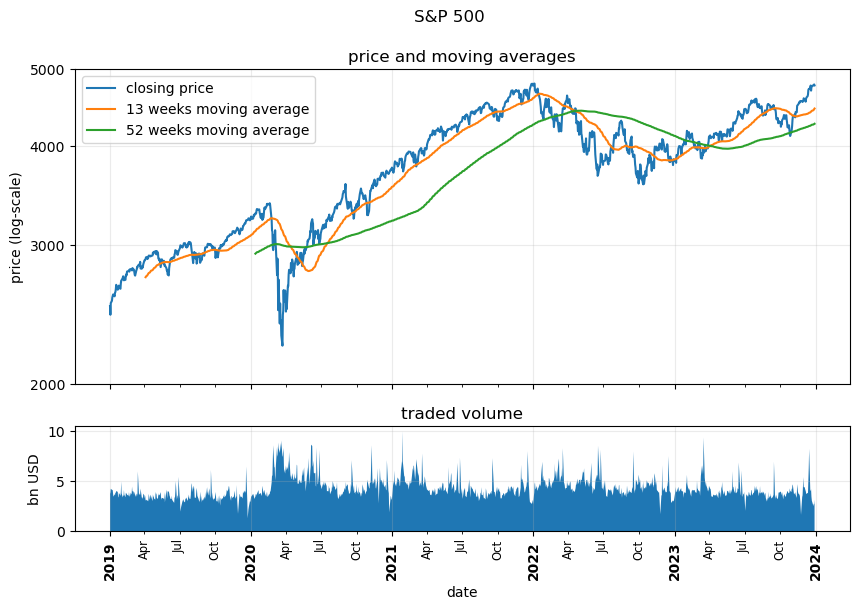

In [27]:
price_ticks = 1e3 * np.array([2, 3, 4, 5])
price_tick_labels = ['2000', '3000', '4000', '5000']

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 6),
                               gridspec_kw={'height_ratios': [3, 1]},
                               sharex=True)

ax1.semilogy(data['Adj Close'], label="closing price")
ax1.plot(MA1, label="13 weeks moving average")
ax1.plot(MA2, label="52 weeks moving average")

ax2.stackplot(data.index, data['Volume']/1e9)

ax1.set_yticks(ticks=price_ticks)
ax1.set_yticklabels(price_tick_labels)

ax2.set_xlabel("date")
ax2.xaxis.set_major_locator(mdates.YearLocator(1))
ax2.xaxis.set_minor_locator(mdates.MonthLocator([4, 7, 10]))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
plt.setp(ax2.get_xticklabels(), rotation=90, weight='bold')
plt.setp(ax2.get_xticklabels(minor=True), rotation=90, size='smaller')

ax1.set_ylabel("price (log-scale)")
ax2.set_ylabel("bn USD")

ax1.set_title("price and moving averages")
ax2.set_title("traded volume")

ax1.grid(alpha=0.25)
ax2.grid(alpha=0.25)

ax1.legend()

fig.suptitle("S&P 500");

# Returns

Plot the returns computed over a period of `offset` days.

In [28]:
offset = 1
returns = data['Adj Close'].pct_change(offset)

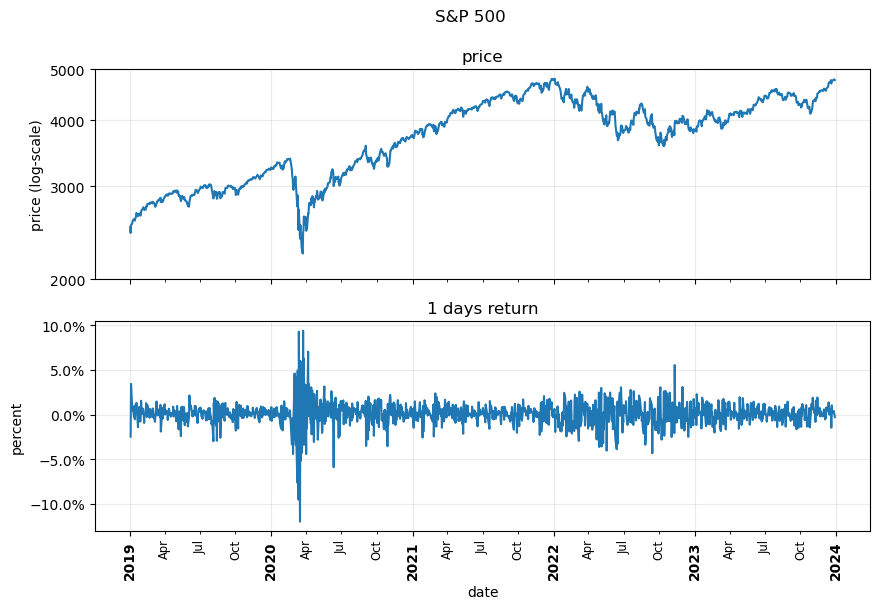

In [29]:
price_ticks = 1e3 * np.array([2, 3, 4, 5])
price_tick_labels = ['2000', '3000', '4000', '5000']

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 6), sharex=True)

ax1.semilogy(data['Adj Close'], label="closing price")
ax2.plot(returns)

ax1.set_yticks(ticks=price_ticks)
ax1.set_yticklabels(price_tick_labels)

ax2.set_xlabel("date")
ax2.xaxis.set_major_locator(mdates.YearLocator(1))
ax2.xaxis.set_minor_locator(mdates.MonthLocator([4, 7, 10]))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
plt.setp(ax2.get_xticklabels(), rotation=90, weight='bold')
plt.setp(ax2.get_xticklabels(minor=True), rotation=90, size='smaller')

ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))

ax1.set_ylabel("price (log-scale)")
ax2.set_ylabel("percent")

ax1.set_title("price")
ax2.set_title(f"{offset} days return")

ax1.grid(alpha=0.25)
ax2.grid(alpha=0.25)

fig.suptitle("S&P 500");

## Arithmetic and log returns

Compute the log returns

In [33]:
data['Adj Close'].head()

Date
2019-01-02    2510.030029
2019-01-03    2447.889893
2019-01-04    2531.939941
2019-01-07    2549.689941
2019-01-08    2574.409912
Name: Adj Close, dtype: float64

In [30]:
data['Adj Close'].shift(1)

Date
2019-01-02            NaN
2019-01-03    2510.030029
2019-01-04    2447.889893
2019-01-07    2531.939941
2019-01-08    2549.689941
                 ...     
2023-12-22    4746.750000
2023-12-26    4754.629883
2023-12-27    4774.750000
2023-12-28    4781.580078
2023-12-29    4783.350098
Name: Adj Close, Length: 1258, dtype: float64

In [34]:
ret_arit = data['Adj Close'] / data['Adj Close'].shift(1) - 1
ret_log = np.log(data['Adj Close']) - np.log(data['Adj Close'].shift(1))

Comparison of arithmetic and log returns

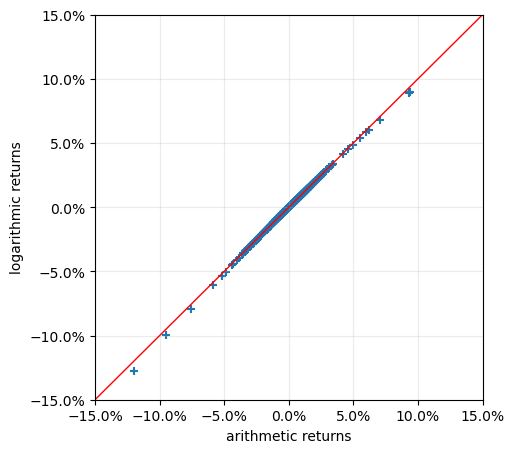

In [35]:
max_absolute_return = 0.15

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(ret_arit, ret_log, marker='+')
ax.plot([-max_absolute_return, max_absolute_return], [-max_absolute_return, max_absolute_return], c='r', lw=1)
ax.set_xlabel('arithmetic returns')
ax.set_ylabel('logarithmic returns')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.set_xlim([-max_absolute_return, max_absolute_return])
ax.set_ylim([-max_absolute_return, max_absolute_return])
ax.grid(alpha=0.25);

# Exercise

Starting from the graph with moving averages and volume, add a third subplot with the **1 year Momentum** defined as  
Momentum = Price(today) - Price(1 year ago).

# Importing multiple tickers

In [2]:
tickers_list = 'ES=F ZB=F GC=F'
tickers_to_names = {'ES=F': 'SP500', # E-Mini S&P 500 Future
                    'ZB=F': 'TBond', # US Treasury Bond Future
                    'GC=F': 'Commo', # S&P GSCI Commodity Index Future
                   }

In [3]:
data = yfinance.download(tickers=tickers_list, start='2019-01-01', end='2023-12-31', interval='1d')
data.head().round(2)

[*********************100%%**********************]  3 of 3 completed


Price      Adj Close                    Close                     High  \
Ticker          ES=F    GC=F    ZB=F     ES=F    GC=F    ZB=F     ES=F   
Date                                                                     
2019-01-02   2511.00  1281.0  146.75  2511.00  1281.0  146.75  2521.25   
2019-01-03   2447.75  1291.8  148.66  2447.75  1291.8  148.66  2493.50   
2019-01-04   2531.25  1282.7  146.88  2531.25  1282.7  146.88  2539.25   
2019-01-07   2550.50  1286.8  146.50  2550.50  1286.8  146.50  2567.50   
2019-01-08   2572.50  1283.2  146.03  2572.50  1283.2  146.03  2581.25   

Price                           Low                     Open                  \
Ticker        GC=F    ZB=F     ES=F    GC=F    ZB=F     ES=F    GC=F    ZB=F   
Date                                                                           
2019-01-02  1286.0  147.44  2452.25  1277.6  145.59  2508.00  1286.0  145.72   
2019-01-03  1292.0  148.78  2443.25  1286.7  146.91  2482.25  1286.8  147.56   
2019-01-04  1294.2  148.84  2438.50  1275.3  146.59  2451.75  1294.2  148.50   
2019-01-07  1286.8  147.53  2523.25  1286.6  146.12  2537.25  1286.8  146.72   
2019-01-08  1283.2  146.44  2547.50  1278.2  145.62  2553.25  1280.5  146.25   

Price        Volume               
Ticker         ES=F GC=F    ZB=F  
Date                              
2019-01-02  1969697  149  350224  
2019-01-03  2257341   10  479904  
2019-01-04  2350836   34  403897  
2019-01-07  1632131    2  312962  
2019-01-08  1664892   54  249917

Note that the column index is a *MultiIndex* with two levels.\
Rename the columns using the *dictionary* `tickers_to_names`. Which level of the *MultiIndex* is concerned?

In [4]:
data.rename(columns=tickers_to_names, level=1, inplace=True)
data.head().round(2)

Price      Adj Close                    Close                     High  \
Ticker         SP500   Commo   TBond    SP500   Commo   TBond    SP500   
Date                                                                     
2019-01-02   2511.00  1281.0  146.75  2511.00  1281.0  146.75  2521.25   
2019-01-03   2447.75  1291.8  148.66  2447.75  1291.8  148.66  2493.50   
2019-01-04   2531.25  1282.7  146.88  2531.25  1282.7  146.88  2539.25   
2019-01-07   2550.50  1286.8  146.50  2550.50  1286.8  146.50  2567.50   
2019-01-08   2572.50  1283.2  146.03  2572.50  1283.2  146.03  2581.25   

Price                           Low                     Open                  \
Ticker       Commo   TBond    SP500   Commo   TBond    SP500   Commo   TBond   
Date                                                                           
2019-01-02  1286.0  147.44  2452.25  1277.6  145.59  2508.00  1286.0  145.72   
2019-01-03  1292.0  148.78  2443.25  1286.7  146.91  2482.25  1286.8  147.56   
2019-01-04  1294.2  148.84  2438.50  1275.3  146.59  2451.75  1294.2  148.50   
2019-01-07  1286.8  147.53  2523.25  1286.6  146.12  2537.25  1286.8  146.72   
2019-01-08  1283.2  146.44  2547.50  1278.2  145.62  2553.25  1280.5  146.25   

Price        Volume                
Ticker        SP500 Commo   TBond  
Date                               
2019-01-02  1969697   149  350224  
2019-01-03  2257341    10  479904  
2019-01-04  2350836    34  403897  
2019-01-07  1632131     2  312962  
2019-01-08  1664892    54  249917

## Multi Index

Extract the `Adj Close` columns for all tickers.

In [6]:
historical_data = data['Adj Close']
historical_data.tail()

Ticker,SP500,Commo,TBond
Date,,,
2023-12-22,4805.25,2057.100098,123.78125
2023-12-26,4825.00,2058.199951,124.25000
2023-12-27,4833.50,2081.899902,125.87500
2023-12-28,4832.25,2073.899902,125.12500
2023-12-29,4820.00,2062.399902,124.93750


## Exercises with the multiindex

Same using the `.loc` method of the DataFrame.\
<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html>

In [ ]:
data.loc[:, 'Adj Close'].round(2)

Extract two columns: `Adj Close` and `Volume`

In [ ]:
data.loc[:, ['Adj Close', 'Volume']].round(2)

**Second level of the multiindex**

Use a slicer: [pandas.IndexSlice](https://pandas.pydata.org/docs/reference/api/pandas.IndexSlice.html)

In [ ]:
idx = pd.IndexSlice
data.loc[:, idx[:, 'SP500']]

In [ ]:
data.loc[:, idx[:, 'SP500']].droplevel(1, axis=1)

In [ ]:
data.loc[idx['2020':'2021'], idx[['Adj Close', 'Volume'], ['SP500', 'TBond']]]

## Checking for missing data

Check if some data is missing

In [7]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2019-01-02 to 2023-12-29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   1259 non-null   float64
 1   Commo   1259 non-null   float64
 2   TBond   1259 non-null   float64
dtypes: float64(3)
memory usage: 39.3 KB


In [8]:
historical_data.isna().any()

Ticker
SP500    False
Commo    False
TBond    False
dtype: bool

In [ ]:
historical_data.to_excel('hist_data.xlsx')

## Relative performance

In [15]:
historical_data / historical_data.iloc[0] * 100

Ticker,SP500,Commo,TBond
Date,,,
2019-01-02,100.000000,100.000000,100.000000
2019-01-03,97.481083,100.843095,101.298978
2019-01-04,100.806452,100.132705,100.085179
2019-01-07,101.573078,100.452775,99.829642
2019-01-08,102.449223,100.171737,99.510221
...,...,...,...
2023-12-22,191.367981,160.585488,84.348382
2023-12-26,192.154520,160.671347,84.667802
2023-12-27,192.493031,162.521460,85.775128


In [16]:
rel_perf = historical_data / historical_data.iloc[0] * 100

In [21]:
for name in rel_perf.columns.to_list():
    print(name)

SP500
Commo
TBond


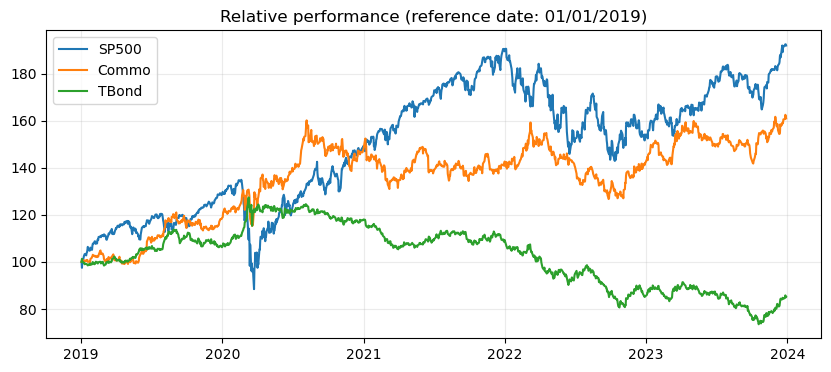

In [17]:
fig, ax = plt.subplots(figsize=(10,4))
for asset in rel_perf.columns:
    ax.plot(rel_perf[asset], label=asset)
ax.grid(alpha=0.25)
ax.set_title("Relative performance (reference date: 01/01/2019)")
ax.legend();

## Returns

In [24]:
historical_data.pct_change().dropna()

Ticker,SP500,Commo,TBond
Date,,,
2019-01-03,-0.025189,0.008431,0.012990
2019-01-04,0.034113,-0.007045,-0.011982
2019-01-07,0.007605,0.003196,-0.002553
2019-01-08,0.008626,-0.002798,-0.003200
2019-01-09,0.003887,0.004754,-0.003210
...,...,...,...
2023-12-22,0.001772,0.008827,-0.001512
2023-12-26,0.004110,0.000535,0.003787
2023-12-27,0.001762,0.011515,0.013078


In [25]:
returns = historical_data.pct_change().dropna()

In [30]:
axs[1]

<Axes: title={'center': 'Commo'}>

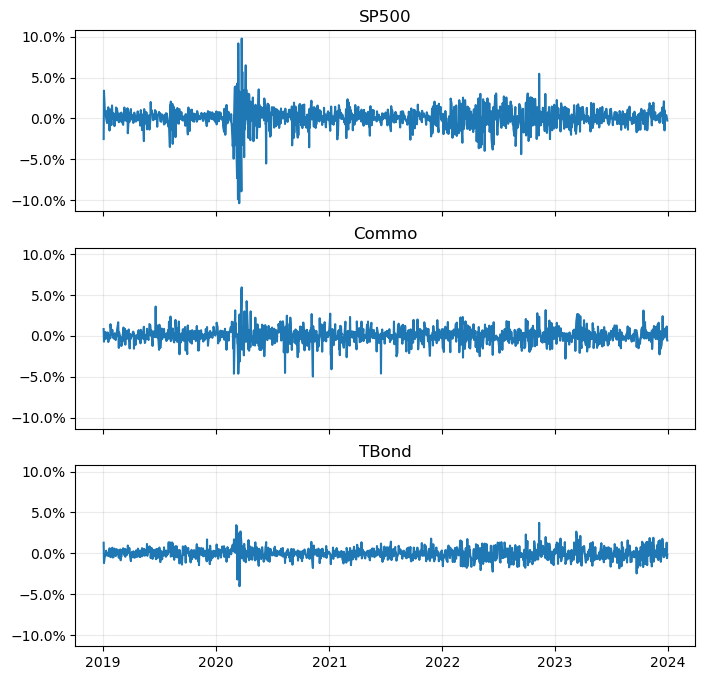

In [26]:
fig, axs = plt.subplots(3, figsize=(8,8), sharex=True, sharey=True)
for ax, asset in zip(axs, returns.columns):
    ax.plot(returns[asset], label=asset)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    ax.grid(alpha=0.25)
    ax.set_title(asset)